# Rendimiento estudiantil (regresión lineal múltiple)
### Explorando factores que afectan el rendimiento estudiantil
## Acerca del conjunto de datos
**Descripción**:
El conjunto de datos de rendimiento estudiantil es un conjunto de datos diseñado para examinar los factores que influyen en el rendimiento académico de los estudiantes. El conjunto de datos consta de 10,000 registros de estudiantes, con cada registro conteniendo información sobre varios predictores y un índice de rendimiento.

## Variables predictoras:
* **Horas estudiadas (*Hours Studied*)**: El número total de horas que cada estudiante pasó estudiando.
* **Calificaciones previas (*Previous Scores*)**: Las calificaciones obtenidas por los estudiantes en pruebas anteriores.
* **Actividades extracurriculares (*Extracurricular Activities*)**: Si el estudiante participa en actividades extracurriculares (Sí o No).
* **Horas de sueño (*Sleep Hours*)**: El número promedio de horas de sueño que el estudiante tuvo por día.
* **Hojas de preguntas de muestra practicadas (*Sample Question Papers Practiced*)**: El número de hojas de preguntas de muestra que el estudiante practicó.

## Variable objetivo:

* **Índice de rendimiento (*Performance Index*)**: Una medida del rendimiento general de cada estudiante. El índice de rendimiento representa el rendimiento académico del estudiante y ha sido redondeado al entero más cercano. El índice varía de 10 a 100, con valores más altos indicando un mejor rendimiento.

El conjunto de datos tiene como objetivo proporcionar información sobre la relación entre las variables predictoras y el índice de rendimiento. Los investigadores y analistas de datos pueden usar este conjunto de datos para explorar el impacto de las horas de estudio, calificaciones previas, actividades extracurriculares, horas de sueño y hojas de preguntas de muestra en el rendimiento estudiantil.

P.D: Tenga en cuenta que este conjunto de datos es sintético y creado con fines ilustrativos. Las relaciones entre las variables y el índice de rendimiento pueden no reflejar escenarios del mundo real.

Info del dataset: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

# Importando librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lectura del dataset

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Manejo de variable categórica

In [4]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 0 if x=='No' else 1)

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# Análisis exploratorio de datos (EDA)

In [6]:
#Dimensiones del dataframe
df.shape

(10000, 6)

In [7]:
#Elinminar ejemplos repetidos
df = df.drop_duplicates()

In [8]:
#Dimensiones del dataframe
df.shape

(9873, 6)

In [9]:
conteo_faltantes = df.isnull().sum()
print(conteo_faltantes)

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [10]:
#Información estadística del dataframe
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


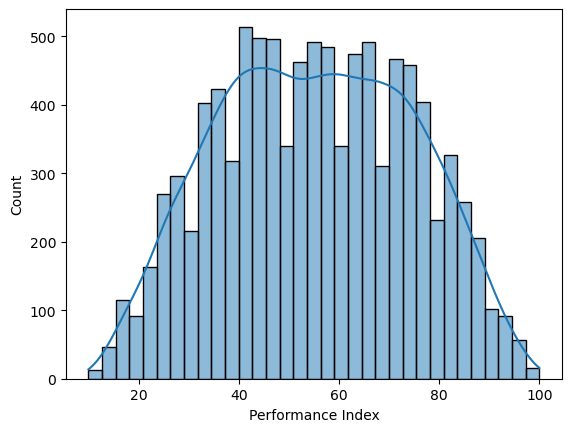

In [11]:
#Distribución de probabilidad de la variable objetivo
sns.histplot(df['Performance Index'], kde=True);

C:\Users\pvelarde\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


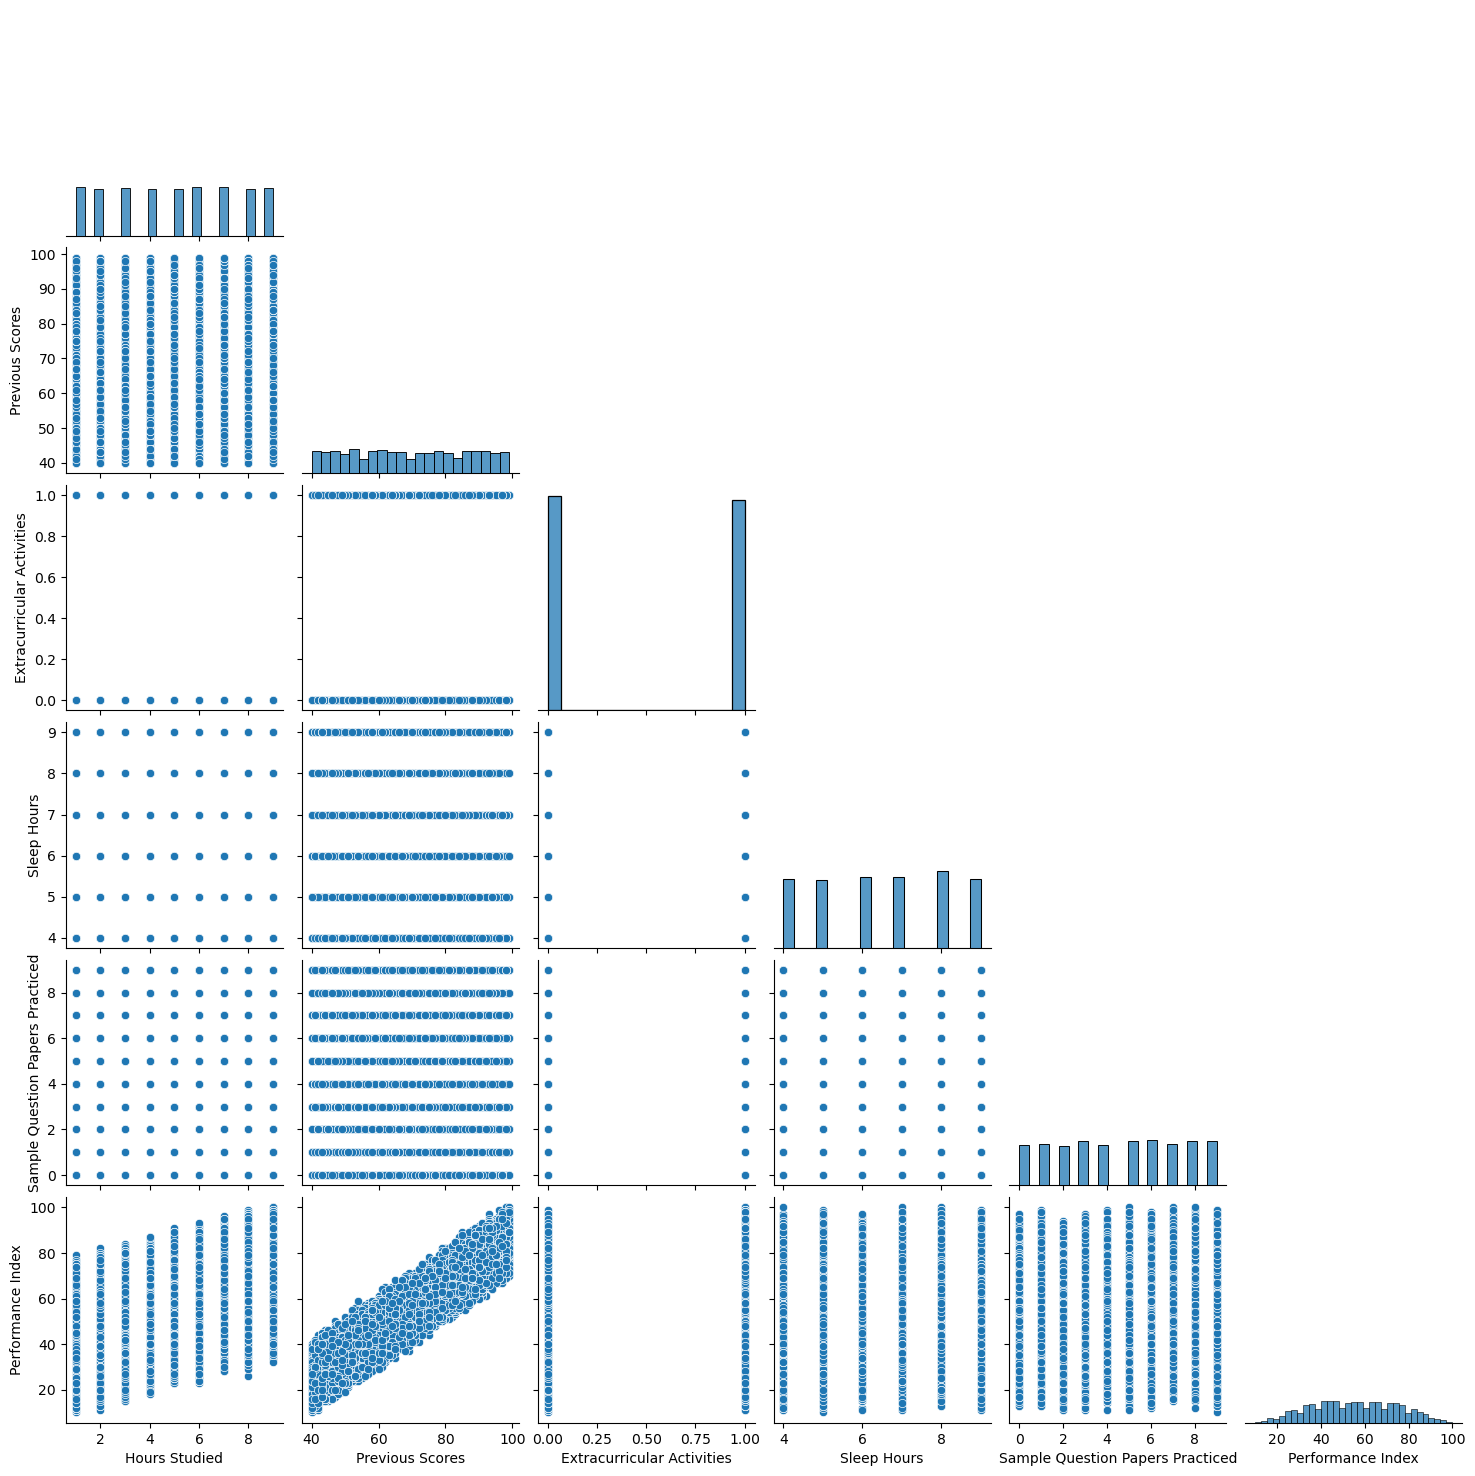

In [12]:
#Matriz de dispersión de las variables predictoras y objetivo
scatter_matrix = sns.pairplot(df, corner=True)


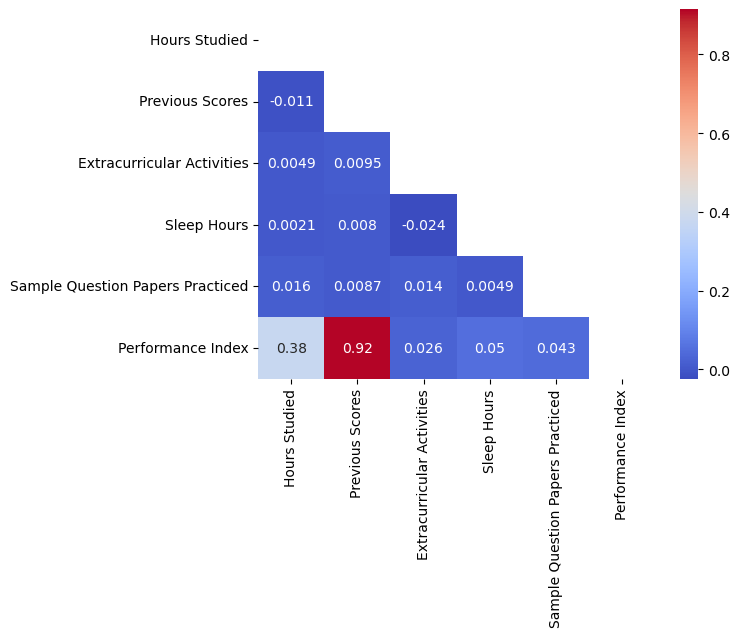

In [13]:
# Crear la matriz de correlación y representarla como un mapa de calor (heatmap)
corr_matrix = df.corr()
# Crea una máscara para ocultar la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Dibujar el mapa de calor solo con la matriz triangular inferior
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask);


# Creación del modelo de regresión lineal

In [14]:
#Separando los regresores de la variable objetivo
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

In [15]:
# creación de los conjuntos de entrenamiento y prueba
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
#Entrenar el modelo de regresión lineal
reg_model = LinearRegression().fit(X_train, y_train)

In [17]:
#Mostras los coeficientes del modelo
print('Intercept: ',reg_model.intercept_)
# Mostrar nombre de coeficientes y su valor
list(zip(X, reg_model.coef_))

Intercept:  -33.96701551454475


[('Hours Studied', 2.8492413451572345),
 ('Previous Scores', 1.018236809174737),
 ('Extracurricular Activities', 0.5568455254314693),
 ('Sleep Hours', 0.4700013984102454),
 ('Sample Question Papers Practiced', 0.19339223788470394)]

In [18]:
#Prediciones sobre el conjunto de prueba 
y_pred= reg_model.predict(X_test)  

In [19]:
#El valor real y su predicción
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
6099,47.0,46.470919
106,76.0,80.249230
9265,62.0,61.029966
4707,23.0,22.732038
2155,76.0,74.839305
...,...,...
4442,78.0,75.697411
9458,47.0,46.244763
5878,30.0,29.514914
2638,52.0,51.345056


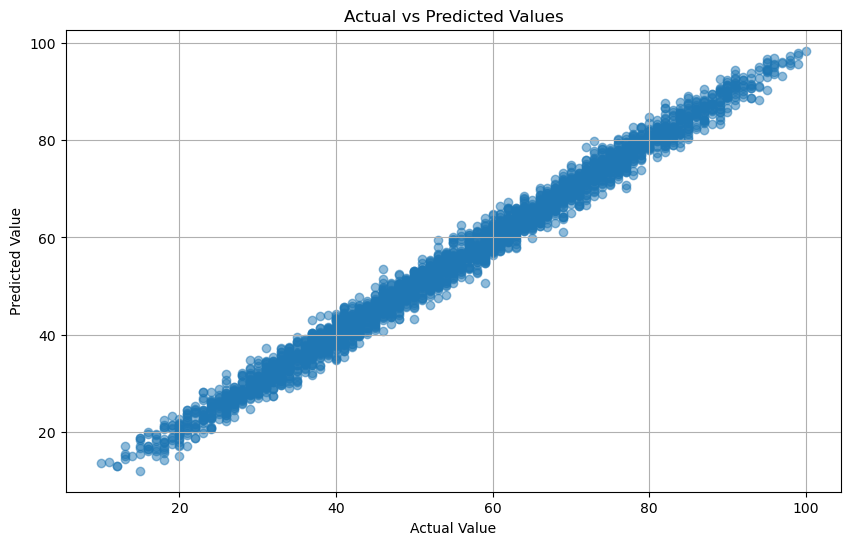

In [20]:
#Scatterplot de valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(reg_model_diff['Actual value'], reg_model_diff['Predicted value'], alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.grid(True)

# Evaluación del modelo

In [21]:
#Métricas de desempeño del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred) 

n = X_test.shape[0] # Número de observaciones
p = X.shape[1]  # Número de predictores
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)


print('Mean Absolute Error:', round(mae, 5))
print('Mean Square Error:', round(mse, 5))
print('Root Mean Square Error:', round(rmse, 5))
print('R-squared: ', round(R2, 5) )
print('R-squared_adjusted: ', round(Adj_r2, 5) )

Mean Absolute Error: 1.6462
Mean Square Error: 4.32618
Root Mean Square Error: 2.07995
R-squared:  0.98816
R-squared_adjusted:  0.98814


# Pruebas de linealidad

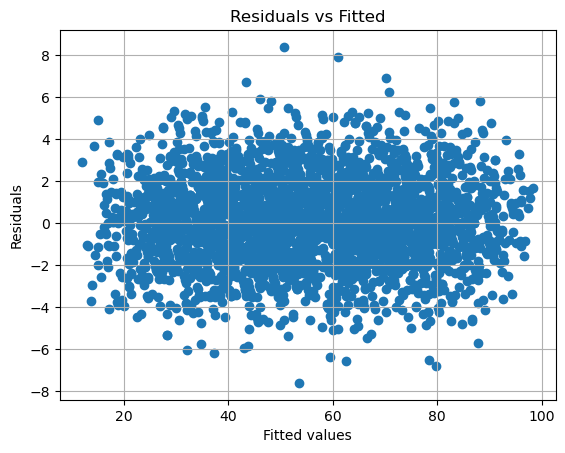

In [22]:
# Verificando la homocedasticidad
# Gráfico de residuos
residuos = y_test - y_pred
plt.scatter(y_pred, residuos)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid(True)

C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


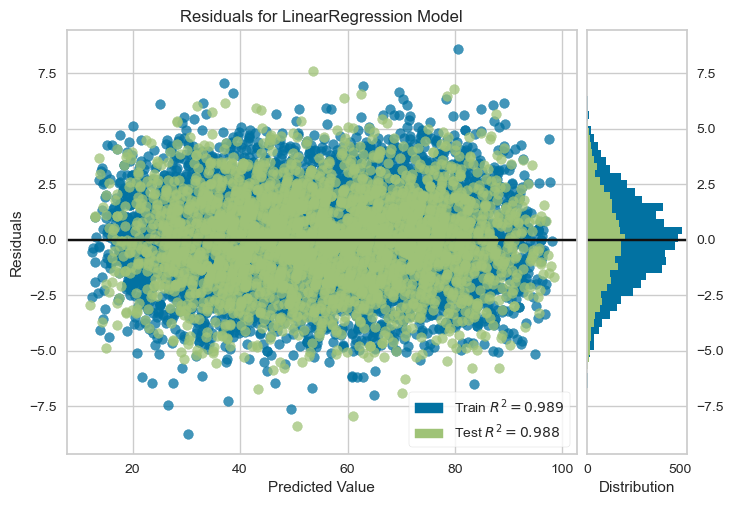

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

((array([-3.4984495 , -3.25450122, -3.11958614, ...,  3.11958614,
          3.25450122,  3.4984495 ]),
  array([-7.605012  , -6.81318466, -6.58139291, ...,  6.90347127,
          7.9195811 ,  8.38565229])),
 (2.080345238947497, 0.06883162685254646, 0.9996739420969893))

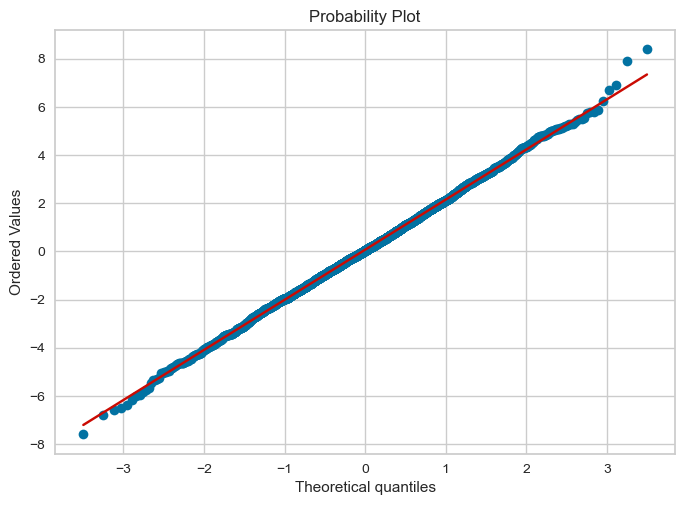

In [24]:
# Verificando la normalidad multivariante
# Q-Q plot de los residuos
import scipy.stats as stats
stats.probplot(residuos, dist="norm", plot=plt)